In [52]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from sklearn.model_selection import RandomizedSearchCV

In [32]:
## Load the dataset
df=pd.read_csv('final_data.csv')
df.head()

,Unnamed: 0,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,0,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,1,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,2,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,3,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,4,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [33]:
## Let's drop the unrequired columns 
df.columns


Index(['Unnamed: 0', 'Vehicle Model', 'Battery Capacity (kWh)',
       'Charging Station ID', 'Charging Station Location',
       'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Charger Type', 'User Type'],
      dtype='object')

In [34]:
df.drop(columns=['Unnamed: 0','Charging Station ID','Charging Start Time','Charging End Time'],axis=1,inplace=True)

In [35]:
df.head()

,Vehicle Model,Battery Capacity (kWh),Charging Station Location,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,BMW i3,108.463007,Houston,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,Hyundai Kona,100.000000,San Francisco,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,Chevy Bolt,75.000000,San Francisco,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,Hyundai Kona,50.000000,Houston,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,Hyundai Kona,50.000000,Los Angeles,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [36]:
X=df.drop('User Type',axis=1)
y=df[['User Type']]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1056, 15), (264, 15))

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Vehicle Model                             1320 non-null   object 
 1   Battery Capacity (kWh)                    1320 non-null   float64
 2   Charging Station Location                 1320 non-null   object 
 3   Energy Consumed (kWh)                     1320 non-null   float64
 4   Charging Duration (hours)                 1320 non-null   float64
 5   Charging Rate (kW)                        1320 non-null   float64
 6   Charging Cost (USD)                       1320 non-null   float64
 7   Time of Day                               1320 non-null   object 
 8   Day of Week                               1320 non-null   object 
 9   State of Charge (Start %)                 1320 non-null   float64
 10  State of Charge (End %)             

In [39]:
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns
print(cat_features)
print(num_features)


Index(['Vehicle Model', 'Charging Station Location', 'Time of Day',
       'Day of Week', 'Charger Type'],
      dtype='object')
Index(['Battery Capacity (kWh)', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'State of Charge (Start %)',
       'State of Charge (End %)', 'Distance Driven (since last charge) (km)',
       'Temperature (°C)', 'Vehicle Age (years)'],
      dtype='object')


In [40]:
numeric_transformer = StandardScaler()
ordinal_transformer = OrdinalEncoder()
preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", ordinal_transformer, cat_features),
          ("StandardScaler", numeric_transformer, num_features)
    ]
)
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OrdinalEncoder(),
                                 Index(['Vehicle Model', 'Charging Station Location', 'Time of Day',
       'Day of Week', 'Charger Type'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Battery Capacity (kWh)', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'State of Charge (Start %)',
       'State of Charge (End %)', 'Distance Driven (since last charge) (km)',
       'Temperature (°C)', 'Vehicle Age (years)'],
      dtype='object'))])

In [41]:
X_train=preprocessor.fit_transform(X_train)

In [42]:
X_test=preprocessor.transform(X_test)

In [43]:
y_train

,User Type
598,Commuter
930,Long-Distance Traveler
209,Casual Driver
538,Casual Driver
140,Casual Driver
...,...
1095,Commuter
1130,Commuter
1294,Commuter
860,Long-Distance Traveler


In [44]:
X_test

array([[ 2.        ,  3.        ,  2.        , ...,  0.79171115,
         1.45825679,  1.03705061],
       [ 4.        ,  1.        ,  3.        , ...,  1.51470061,
         0.86157381,  1.46887096],
       [ 4.        ,  4.        ,  1.        , ...,  1.11393343,
        -0.25531151,  1.46887096],
       ...,
       [ 0.        ,  2.        ,  2.        , ...,  0.38460953,
         0.50970827,  0.17340992],
       [ 3.        ,  2.        ,  3.        , ..., -1.56695374,
         0.2182718 , -1.55387147],
       [ 4.        ,  1.        ,  3.        , ..., -0.57151906,
         0.19211478, -1.12205112]])

In [45]:
y_train=ordinal_transformer.fit_transform(y_train)


In [46]:
y_test=ordinal_transformer.transform(y_test)

In [47]:
X_train.shape

(1056, 15)

In [48]:
X_test.shape

(264, 15)

In [49]:
y_train.shape

(1056, 1)

In [50]:
y_test.shape

(264, 1)

In [51]:
X_train

array([[ 2.        ,  1.        ,  1.        , ...,  0.462555  ,
        -0.21018922, -1.55387147],
       [ 3.        ,  0.        ,  3.        , ...,  1.11900303,
        -0.75281201,  0.60523027],
       [ 0.        ,  2.        ,  3.        , ..., -0.77890242,
         0.93788827, -1.12205112],
       ...,
       [ 1.        ,  1.        ,  1.        , ..., -0.81098942,
         0.73484385,  1.03705061],
       [ 4.        ,  1.        ,  2.        , ...,  1.04211102,
        -0.83394972,  1.03705061],
       [ 0.        ,  4.        ,  2.        , ..., -0.38805606,
         1.54135204,  1.46887096]])

In [54]:
from sklearn.cluster import KMeans

In [55]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
wcss 

[20991.857954545456,
 17699.543952517375,
 16820.50717103231,
 16105.18663885739,
 15547.984750469303,
 15038.097227951494,
 14726.957133792837,
 14482.091131085816,
 14294.605555980303,
 13974.1420150934]

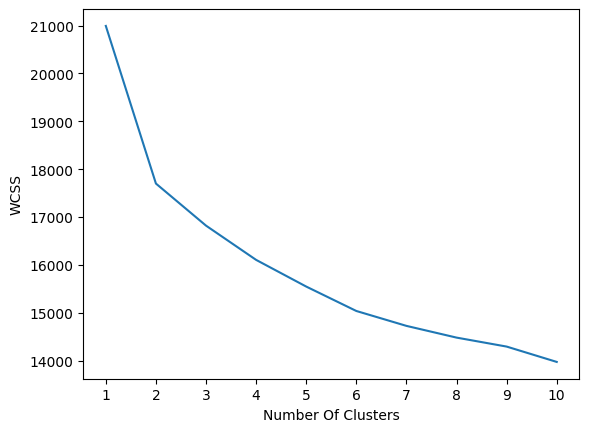

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
## Plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number Of Clusters")
plt.ylabel("WCSS")
plt.show()

In [58]:
kmeans=KMeans(n_clusters=k,init='k-means++')

In [59]:
kmeans.fit_predict(X_train)

array([2, 3, 8, ..., 5, 3, 4])

In [60]:
y_pred=kmeans.predict(X_test)

In [61]:
y_pred

array([6, 9, 7, 4, 5, 9, 1, 3, 5, 4, 2, 1, 2, 2, 8, 5, 1, 6, 3, 5, 8, 2,
       6, 7, 8, 1, 2, 2, 1, 3, 4, 4, 4, 9, 1, 4, 1, 5, 1, 2, 9, 8, 7, 7,
       1, 1, 0, 6, 5, 9, 6, 2, 6, 4, 5, 3, 7, 6, 7, 6, 7, 6, 5, 5, 7, 4,
       2, 8, 4, 3, 6, 6, 6, 1, 9, 8, 8, 2, 4, 8, 8, 9, 1, 5, 6, 6, 6, 4,
       9, 1, 7, 7, 4, 5, 5, 3, 2, 3, 6, 6, 7, 3, 5, 7, 9, 0, 1, 7, 1, 9,
       5, 5, 1, 6, 0, 6, 7, 1, 9, 4, 3, 3, 3, 6, 2, 1, 9, 4, 4, 2, 7, 4,
       6, 6, 9, 7, 3, 1, 5, 1, 2, 5, 6, 4, 6, 1, 3, 2, 0, 1, 8, 4, 3, 8,
       6, 3, 4, 0, 8, 1, 3, 5, 5, 2, 3, 4, 2, 6, 5, 1, 2, 5, 0, 8, 8, 8,
       2, 9, 1, 2, 6, 2, 1, 0, 5, 6, 2, 4, 6, 3, 2, 6, 5, 6, 8, 9, 3, 8,
       5, 2, 7, 9, 4, 5, 5, 1, 7, 7, 2, 5, 4, 7, 3, 2, 7, 4, 4, 3, 9, 3,
       4, 5, 4, 1, 3, 7, 3, 6, 2, 8, 6, 5, 6, 1, 5, 5, 2, 8, 9, 0, 2, 9,
       7, 0, 4, 8, 3, 7, 8, 7, 3, 1, 6, 8, 7, 0, 7, 4, 2, 7, 4, 4, 0, 9])

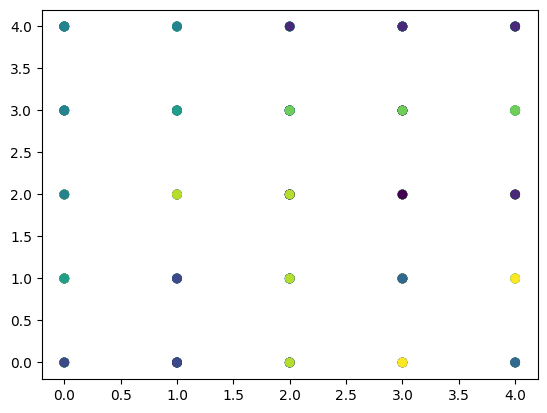

In [62]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [63]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [64]:
kl.elbow

3

In [65]:
## Silhoutee Scoring
from sklearn.metrics import silhouette_score

silhouette_coefficiets=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficiets.append(score)
silhouette_coefficiets

[0.14404707368430222,
 0.10272686970097164,
 0.07962928020061556,
 0.07381632851148116,
 0.07153652781708296,
 0.07016023682567989,
 0.06489616777325036,
 0.061453913700711765,
 0.062393312580349504]

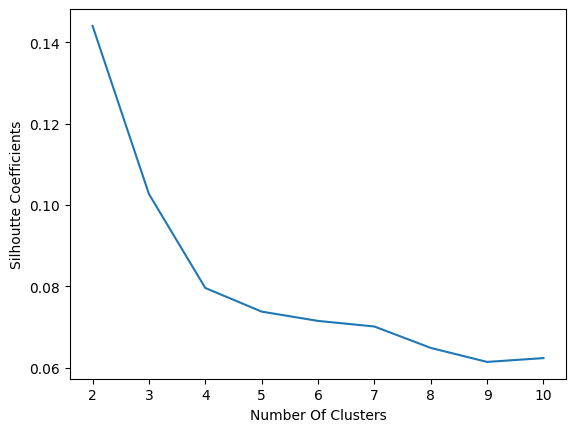

In [66]:
## Plotting silhouette Score
plt.plot(range(2,11),silhouette_coefficiets)
plt.xticks(range(2,11))
plt.xlabel("Number Of Clusters")
plt.ylabel("Silhoutte Coefficients")
plt.show()

In [67]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.3)
dbscan.fit(X_train)

DBSCAN(eps=0.3)

In [68]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [70]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [71]:
pca_scaled_data=pca.fit_transform(X_train)

In [72]:
pca_scaled_data

array([[ 1.90137532,  0.27086121],
       [ 1.76938406,  1.53663857],
       [-1.95564252, -2.24732631],
       ...,
       [-1.9081118 , -0.87435074],
       [-0.16491051,  2.09263221],
       [ 0.22026164, -2.45407018]])

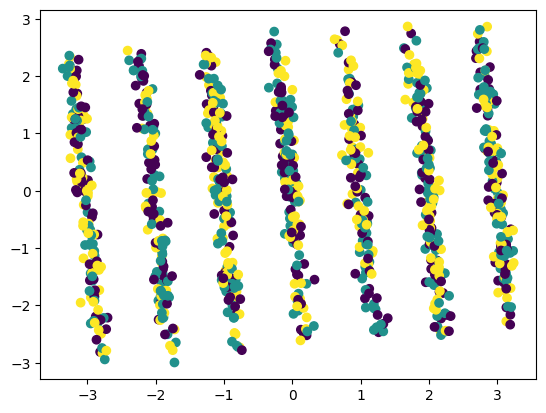

In [76]:
plt.scatter(pca_scaled_data[:,0],pca_scaled_data[:,1],c=y_train)

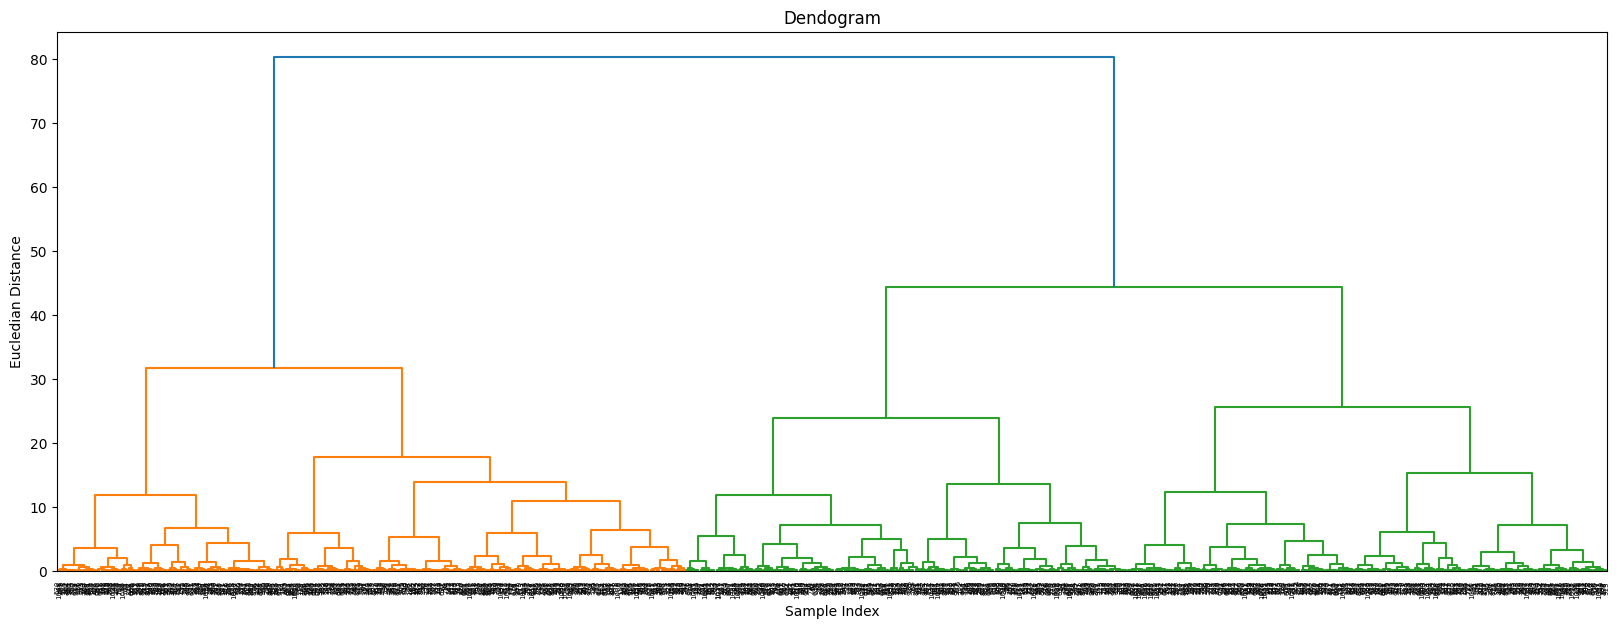

In [77]:
import scipy.cluster.hierarchy as sc
## Plot the dendogram
plt.figure(figsize=(20,7))
plt.title("Dendograms")

## Create dendogram
sc.dendrogram(sc.linkage(pca_scaled_data,method='ward'))
plt.title("Dendogram")
plt.xlabel("Sample Index")
plt.ylabel("Eucledian Distance")
plt.show()

In [78]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,linkage='ward')
cluster.fit(pca_scaled_data)

AgglomerativeClustering()

In [79]:
cluster.labels_

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

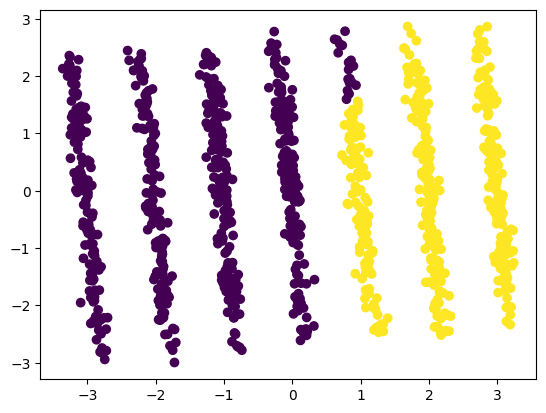

In [80]:
plt.scatter(pca_scaled_data[:,0],pca_scaled_data[:,1],c=cluster.labels_)

In [83]:
df['User Type'].value_counts()

User Type
Commuter                  476
Long-Distance Traveler    437
Casual Driver             407
Name: count, dtype: int64